In [83]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import random

In [84]:
img_id = cv2.imread('wa.jpg',1)


In [85]:
img_hsv = cv2.cvtColor(img_id,cv2.COLOR_BGR2HSV)
img_hsv.shape


(799, 550, 3)

In [86]:
def my_show(img,size=(8,8)):
    plt.figure(figsize=size)
    plt.imshow(cv2.cvtColor(img_id,cv2.COLOR_BGR2RGB))
    plt.show()

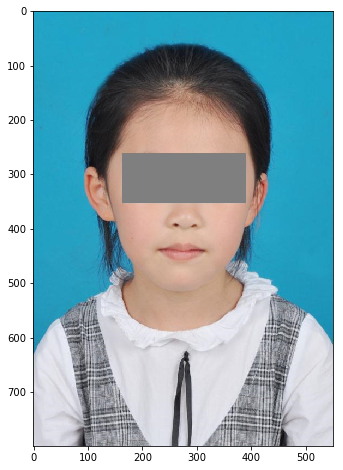

In [87]:
my_show(img_id)

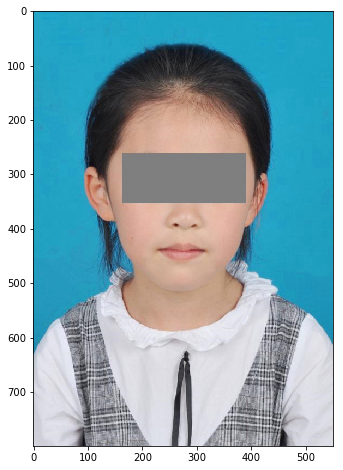

In [88]:
def my_hsvshow(hsvimg,size=(8,8)):
    plt.figure(figsize=size)
    plt.imshow(cv2.cvtColor(hsvimg,cv2.COLOR_HSV2RGB))
    plt.show()   
my_hsvshow(img_hsv)

In [154]:
# 敏感度
sensitivity = 15
# 定义蓝色在hsv的范围
lower_blue = np.array([85-sensitivity,100,100])
upper_blue = np.array([85+sensitivity,255,255])
# 这里有个坑，HSV里蓝色H值是240，然后在cv2里H值减半是120，zhihu上代码按120+-来做本来是OK的。
# 但是我选的这个ID照片原始是湖蓝背景，转成hsv后，见上图，可以看到人脸及眼睛遮层变成蓝了，反而背景蓝偏绿了，我们的目的是要把背景换掉，因此
# 用zhihu这个怎么扣都扣的人脸！！！因此找了个colorPicker的工具看了下hsv图里现在这个蓝绿背景的H值，改成85后，背景和人就顺利分开了
mask_blue = cv2.inRange(img_hsv,lower_blue,upper_blue)

# 这一段算完是把背景和前景分开了，（5，5）是平滑度，更小的话，可以分的更细腻，为什么这么算就看懂
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
mask_blue = cv2.morphologyEx(mask_blue, cv2.MORPH_CLOSE, kernel)  # 闭运算
mask_blue = cv2.morphologyEx(mask_blue, cv2.MORPH_OPEN, kernel)   # 开运算
# 算完背景是黑255，前景是白0
print(mask_blue)
# cv2.imshow('aaa',mask_blue)
# if cv2.waitKey(0)==27:
#     cv2.destroyAllWindows()

[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 ..., 
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]]


In [137]:
H,S,V = cv2.split(img_hsv)
print(H[0][0])

96


In [139]:
new_mask_blue = mask_blue
new_mask_blue[new_mask_blue==255] = 25
print(new_mask_blue)

[[25 25 25 ..., 25 25 25]
 [25 25 25 ..., 25 25 25]
 [25 25 25 ..., 25 25 25]
 ..., 
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]]


In [155]:
def img_bgColorChange(img,mask,destColorH):
    H,S,V = cv2.split(img)
    print(mask)
    mask[mask==255] = destColorH
    # H[(bg-sensitivity)<H<(bg+sensitivity)]=destColorH
    print(mask)
    H=H+mask
    print(H)
    return cv2.merge((H,S,V))
#     print(H)
#     H=H+mask_blue
#     print(H)
#     H[H>255] = (H[H>255]-255-(srcColorH-destColorH)).astype(img.dtype)


In [156]:
new_img_hsv = img_bgColorChange(img_hsv,mask_blue,40)

[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 ..., 
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]]
[[40 40 40 ..., 40 40 40]
 [40 40 40 ..., 40 40 40]
 [40 40 40 ..., 40 40 40]
 ..., 
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]]
[[136 136 136 ..., 136 136 136]
 [136 136 136 ..., 136 136 136]
 [136 136 136 ..., 136 136 136]
 ..., 
 [120 120 120 ..., 120 120 120]
 [120 120 120 ..., 120 120 120]
 [120 120 120 ..., 120 120 120]]


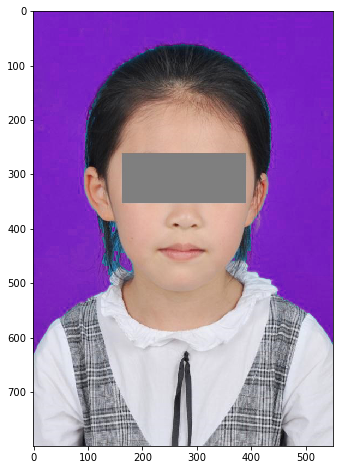

In [157]:
my_hsvshow(new_img_hsv)

In [91]:
img_bgnew= img_bgColorChange(img_hsv,85,25)

[[ 96  96  96 ...,  96  96  96]
 [ 96  96  96 ...,  96  96  96]
 [ 96  96  96 ...,  96  96  96]
 ..., 
 [120 120 120 ..., 120 120 120]
 [120 120 120 ..., 120 120 120]
 [120 120 120 ..., 120 120 120]]
[[ 95  95  95 ...,  95  95  95]
 [ 95  95  95 ...,  95  95  95]
 [ 95  95  95 ...,  95  95  95]
 ..., 
 [120 120 120 ..., 120 120 120]
 [120 120 120 ..., 120 120 120]
 [120 120 120 ..., 120 120 120]]


In [107]:
new_mask_blue = mask_blue
new_mask_blue[new_mask_blue==255] = 25
print(new_mask_blue)

[[25 25 25 ..., 25 25 25]
 [25 25 25 ..., 25 25 25]
 [25 25 25 ..., 25 25 25]
 ..., 
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]]


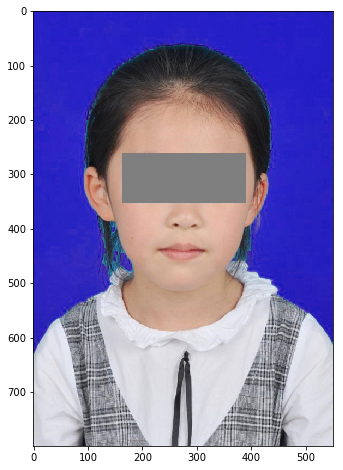

In [108]:

H,S,V = cv2.split(img_hsv)
H = H +new_mask_blue
my_hsvshow(cv2.merge((H,S,V)))